In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(
    style="whitegrid",
    font_scale=1.0,
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False
    }
)

purple_palette = [
    "#DEC2FF",
    "#9671C9",
    "#7C3AED",
    "#A855F7",
    "#EC4899",
    "#752AAD",
    "#7518F5",
    "#7B26FF",
]

single_purple = "#7C3AED"

from matplotlib.colors import LinearSegmentedColormap
purple_cmap = LinearSegmentedColormap.from_list(
    "purple_cmap",
    ["#FDF2FF", "#C4B5FD", "#7C3AED", "#4C1D95"]
)

In [ ]:
df = pd.read_csv("unwomen-violence.csv", encoding="latin-1")
df.head(15)

,Title,Template,Year,Region,Form of Violence,Type of Measure,Country
0,Article 336 of the Penal Code,Measure,1984.0,Africa,Sexual violence,Laws > Violence against women > Legislation,Algeria
1,Article 34 of the Constitution,Measure,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria
2,Article 35 of the Constitution,Measure,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria
3,Association Femmes En Communication - Actions ...,Measure,2000.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria
4,Lancement De La Strat?gie Nationale De Lutte C...,Measure,2000.0,Africa,Domestic violence/Intimate partner violence,Research and statistical data > Other research...,Algeria
5,Police Survey on Violence against Women,Measure,2001.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Administrative...,Algeria
6,H?bergement Temporaires,Measure,2002.0,Africa,Violence against women and girls,Services > Social services > Shelter Safe acco...,Algeria
7,L'enqu?te Nationale Sur La Violence ? L'encont...,Measure,2002.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Dedicated viol...,Algeria
8,Atelier Portant Sur « L'analyse De La Situatio...,Measure,2003.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria
9,Journ?e Internationale Pour L'?limination De L...,Measure,2004.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria


In [ ]:
df.isna().sum()

,0
Title,4
Template,0
Year,1607
Region,6
Form of Violence,13
Type of Measure,4
Country,8


In [ ]:
for col in ["Region", "Form of Violence", "Type of Measure",
            "Country", "Title", "Template"]:
    df[col] = df[col].astype(str).str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10713 entries, 0 to 10712
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             10713 non-null  object 
 1   Template          10713 non-null  object 
 2   Year              9106 non-null   float64
 3   Region            10713 non-null  object 
 4   Form of Violence  10713 non-null  object 
 5   Type of Measure   10713 non-null  object 
 6   Country           10713 non-null  object 
dtypes: float64(1), object(6)
memory usage: 586.0+ KB


In [ ]:
df_year = df[df["Year"].notna()].copy()
df_region = df[df["Region"].notna()].copy()
df_viol = df[df["Form of Violence"].notna()].copy()

In [ ]:
df_year["Year"] = df_year["Year"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10713 entries, 0 to 10712
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             10713 non-null  object 
 1   Template          10713 non-null  object 
 2   Year              9106 non-null   float64
 3   Region            10713 non-null  object 
 4   Form of Violence  10713 non-null  object 
 5   Type of Measure   10713 non-null  object 
 6   Country           10713 non-null  object 
dtypes: float64(1), object(6)
memory usage: 586.0+ KB


In [ ]:
recent = df_year.copy()

In [ ]:
# take only top level before ">"
recent["measure_main"] = (
    recent["Type of Measure"]
    .astype(str)
    .str.split(">")
    .str[0]
    .str.strip()
)

def normalize_measure(s):
    s = str(s).strip().lower()
    if s.startswith("law"):
        return "Laws"
    if s.startswith("policy"):
        return "Policies"
    if s.startswith("services"):
        return "Services"
    if s.startswith("prevention"):
        return "Prevention"
    if "budget" in s:
        return "Budgets"
    if "research" in s or "statistical data" in s or "administrative data" in s:
        return "Research and data"
    if "institutional" in s:
        return "Institutional mechanisms"
    if "monitoring" in s:
        return "Monitoring & evaluation"
    if "regional" in s or "international initiative" in s:
        return "Regional/International initiatives"
    if "perpetrator" in s:
        return "Perpetrators programmes"
    return s.title()

recent["measure_group"] = recent["measure_main"].apply(normalize_measure)

In [ ]:
measure_group_counts = (
    recent["measure_group"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

measure_group_counts

,proportion
measure_group,
Laws,26.4
Services,20.4
Prevention,14.3
Policies,13.4
Research and data,11.3
Institutional mechanisms,8.8
Budgets,2.6
Perpetrators programmes,0.9
Monitoring & evaluation,0.9


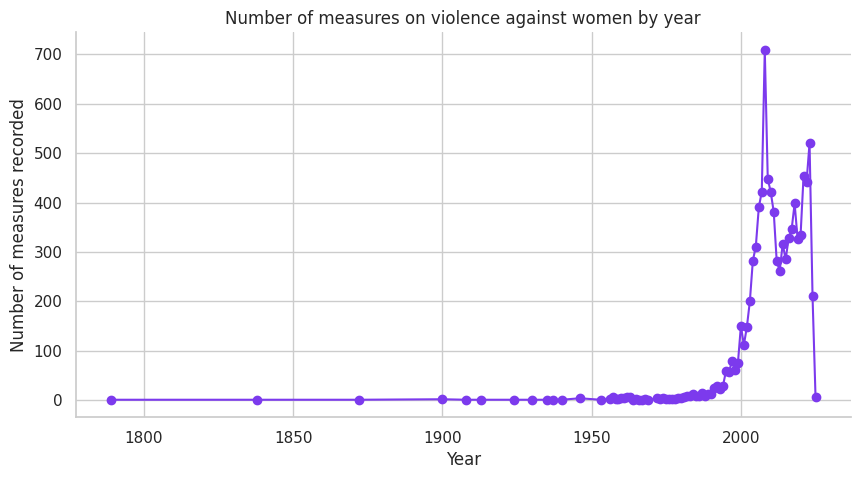

In [ ]:
measures_by_year = (
    recent
    .groupby("Year", as_index=False)["Title"]
    .count()
    .rename(columns={"Title": "n_measures"})
)

plt.figure(figsize=(10,5))
plt.plot(measures_by_year["Year"], measures_by_year["n_measures"], marker="o", color=single_purple)
plt.title("Number of measures on violence against women by year")
plt.xlabel("Year")
plt.ylabel("Number of measures recorded")
plt.grid(True)
plt.show()

/tmp/ipython-input-3295166294.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x="n_measures", y="Region", palette=purple_palette)
/tmp/ipython-input-3295166294.py:10: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(data=region_counts, x="n_measures", y="Region", palette=purple_palette)


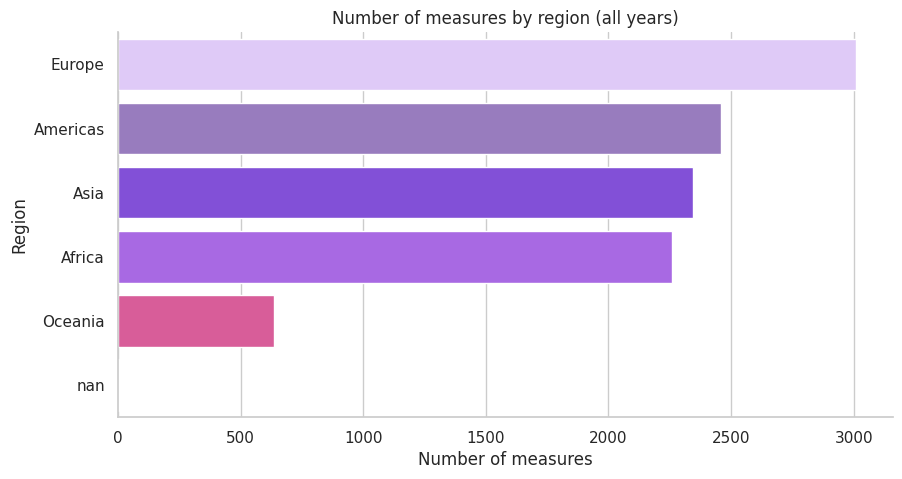

In [ ]:
region_counts = (
    df_region
    .groupby("Region", as_index=False)["Title"]
    .count()
    .rename(columns={"Title": "n_measures"})
    .sort_values("n_measures", ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(data=region_counts, x="n_measures", y="Region", palette=purple_palette)
plt.title("Number of measures by region (all years)")
plt.xlabel("Number of measures")
plt.ylabel("Region")
plt.show()

In [ ]:
measure_region = (
    recent[recent["Region"].notna()]
    .groupby(["Region", "measure_group"])["Title"]
    .count()
    .reset_index(name="n")
)

region_totals = (
    measure_region
    .groupby("Region")["n"]
    .sum()
    .reset_index(name="region_total")
)

measure_region = measure_region.merge(region_totals, on="Region")
measure_region["share_pct"] = measure_region["n"] / measure_region["region_total"] * 100

In [ ]:
# top-3 measure types in each region
top3_region_measures = (
    measure_region
    .sort_values(["Region", "share_pct"], ascending=[True, False])
    .groupby("Region")
    .head(3)
)

top3_region_measures

,Region,measure_group,n,region_total,share_pct
3,Africa,Laws,536,1781,30.095452
6,Africa,Policies,279,1781,15.665357
10,Africa,Services,263,1781,14.766985
13,Americas,Laws,476,2034,23.402163
20,Americas,Services,432,2034,21.238938
17,Americas,Prevention,333,2034,16.371681
23,Asia,Laws,574,2057,27.904716
30,Asia,Services,472,2057,22.946038
27,Asia,Prevention,286,2057,13.903743
33,Europe,Laws,653,2676,24.402093


In [ ]:
def split_violence(s):
    if pd.isna(s) or str(s).lower() == "nan":
        return []
    return [p.strip() for p in str(s).split(";") if p.strip()]

viol_exploded = df_viol.assign(
    violence_form=df_viol["Form of Violence"].apply(split_violence)
).explode("violence_form")

viol_exploded["violence_norm"] = (
    viol_exploded["violence_form"]
    .astype(str)
    .str.strip()
    .str.lower()
)

In [ ]:
viol_global = (
    viol_exploded
    .groupby("violence_norm")["Title"]
    .count()
    .reset_index(name="n")
    .sort_values("n", ascending=False)
)

total = viol_global["n"].sum()
viol_global["share_pct"] = viol_global["n"] / total * 100

viol_global.head(10)

,violence_norm,n,share_pct
17,violence against women and girls,5459,43.103040
1,domestic violence/intimate partner violence,2491,19.668377
15,trafficking,1509,11.914726
11,sexual violence,1130,8.922227
9,sexual harassment,532,4.200553
14,technology-facilitated violence against women ...,439,3.466246
2,female genital mutilation,427,3.371496
0,child early and forced marriage,301,2.376629
8,other harmful practices,152,1.200158
12,stalking,86,0.679037


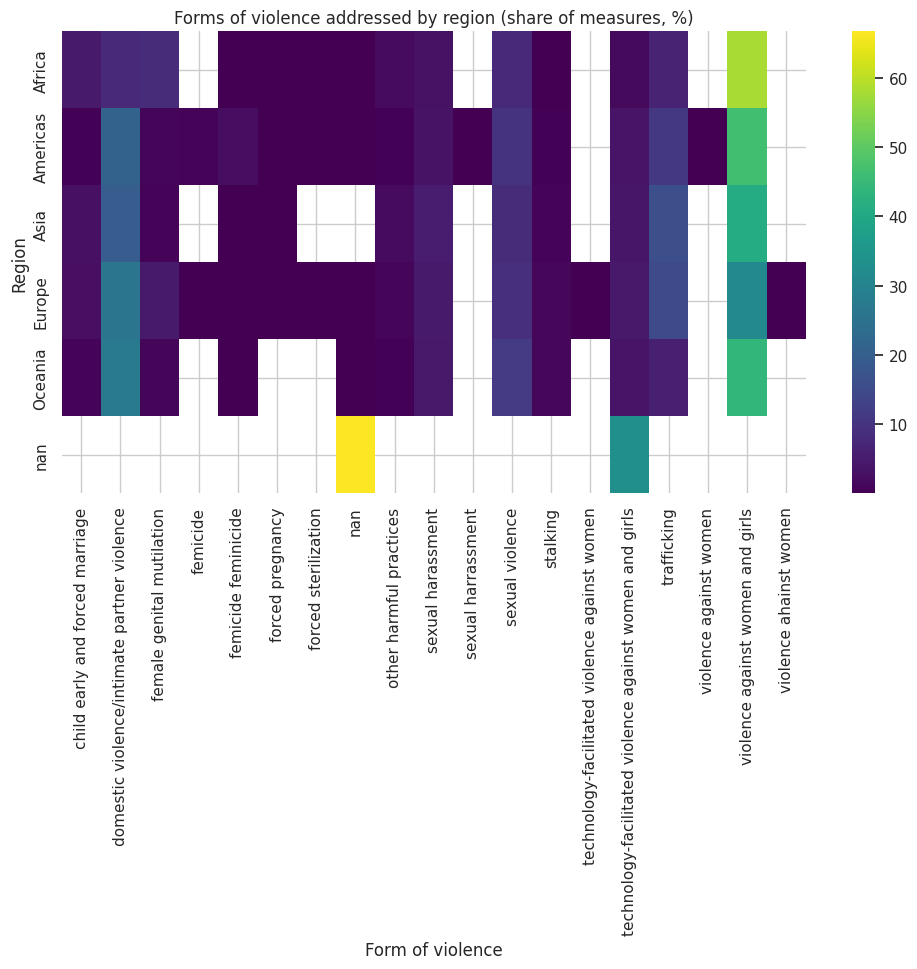

In [ ]:
region_viol = (
    viol_exploded[viol_exploded["Region"].notna()]
    .groupby(["Region", "violence_norm"])["Title"]
    .count()
    .reset_index(name="n")
)

region_totals = (
    region_viol
    .groupby("Region")["n"]
    .sum()
    .reset_index(name="region_total")
)

region_viol = region_viol.merge(region_totals, on="Region")
region_viol["share_pct"] = region_viol["n"] / region_viol["region_total"] * 100

pivot_rv = region_viol.pivot_table(
    index="Region",
    columns="violence_norm",
    values="share_pct"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_rv, cmap="viridis")
plt.title("Forms of violence addressed by region (share of measures, %)")
plt.xlabel("Form of violence")
plt.ylabel("Region")
plt.show()

     Country  n_measures
0  Australia         188
1     Canada         187
2     France         165
3    Belgium         133
4    Ecuador         128
Index(['Country', 'n_measures'], dtype='object')


/tmp/ipython-input-3601172311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="n_measures", y="Country", palette=purple_palette)
/tmp/ipython-input-3601172311.py:13: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_countries, x="n_measures", y="Country", palette=purple_palette)


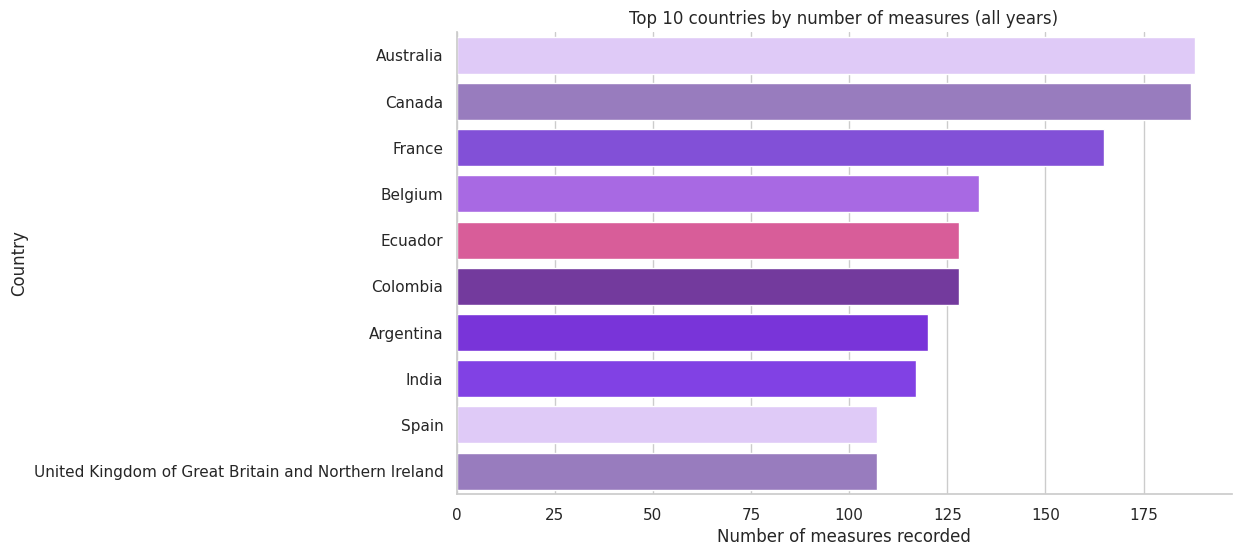

In [ ]:
top_countries = (
    recent["Country"]
    .value_counts()
    .head(10)
    .rename_axis("Country")
    .reset_index(name="n_measures")
)

print(top_countries.head())
print(top_countries.columns)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x="n_measures", y="Country", palette=purple_palette)
plt.title("Top 10 countries by number of measures (all years)")
plt.xlabel("Number of measures recorded")
plt.ylabel("Country")
plt.show()